In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
from sklearn.linear_model import BayesianRidge, LinearRegression

In [6]:
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data

# Create weights with a precision of 4.
lambda_ = 4.
w = np.zeros(n_features)

# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
    
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)

# Create the target
Y = np.dot(X, w) + noise


In [7]:
bayes_reg = BayesianRidge(compute_score=True)
bayes_reg.fit(X, Y)

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

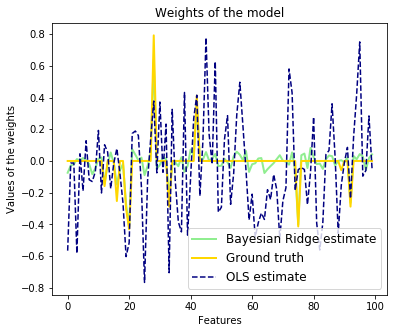

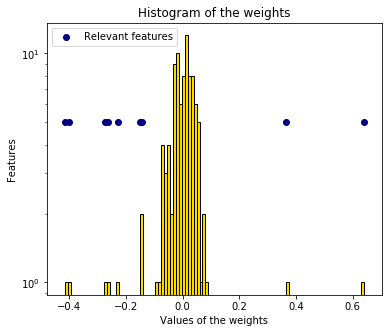

In [8]:
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(bayes_reg.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(lin_reg.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(bayes_reg.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(bayes_reg.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")


In [16]:
X[1].size


100

Text(0,0.5,'Values of the weights')

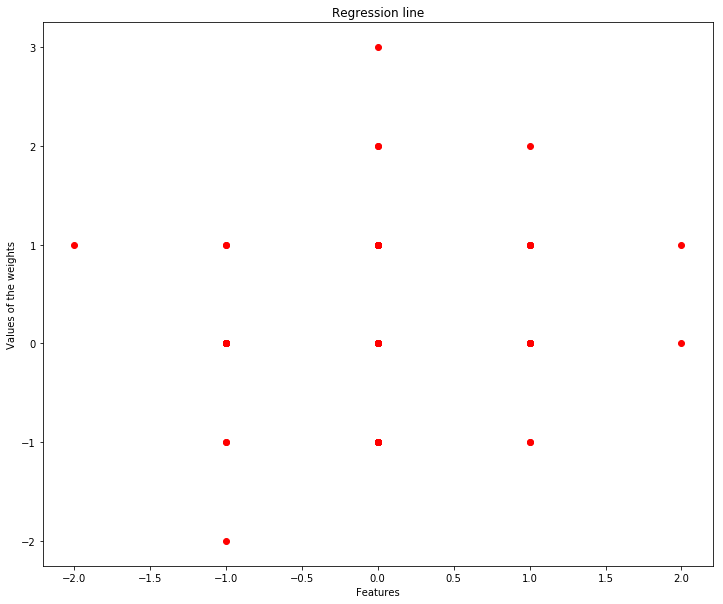

In [20]:
plt.figure(figsize=(12, 10))
plt.title("Regression line")
plt.scatter(X[1].astype('int'), Y.astype('int'), color = 'red')

#plt.plot(X.astype('int'), bayes_reg.predict(X), color = 'blue')
plt.xlabel("Features")
plt.ylabel("Values of the weights")